<a href="https://colab.research.google.com/github/MestreMoniz/trsa_lab2/blob/main/ObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Dec  5 13:41:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 6.2 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.20GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


# Nova secção

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Rz5XLLKByaM8cEJUdhvm")
project = rf.workspace("trsalab2").project("object-detection-iydmi")
dataset = project.version(1).download("yolov8")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.222, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Object-Detection-1 in yolov8:: 100%|██████████| 5210/5210 [00:00<00:00, 7216.59it/s]


In [9]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Object-Detection-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, f

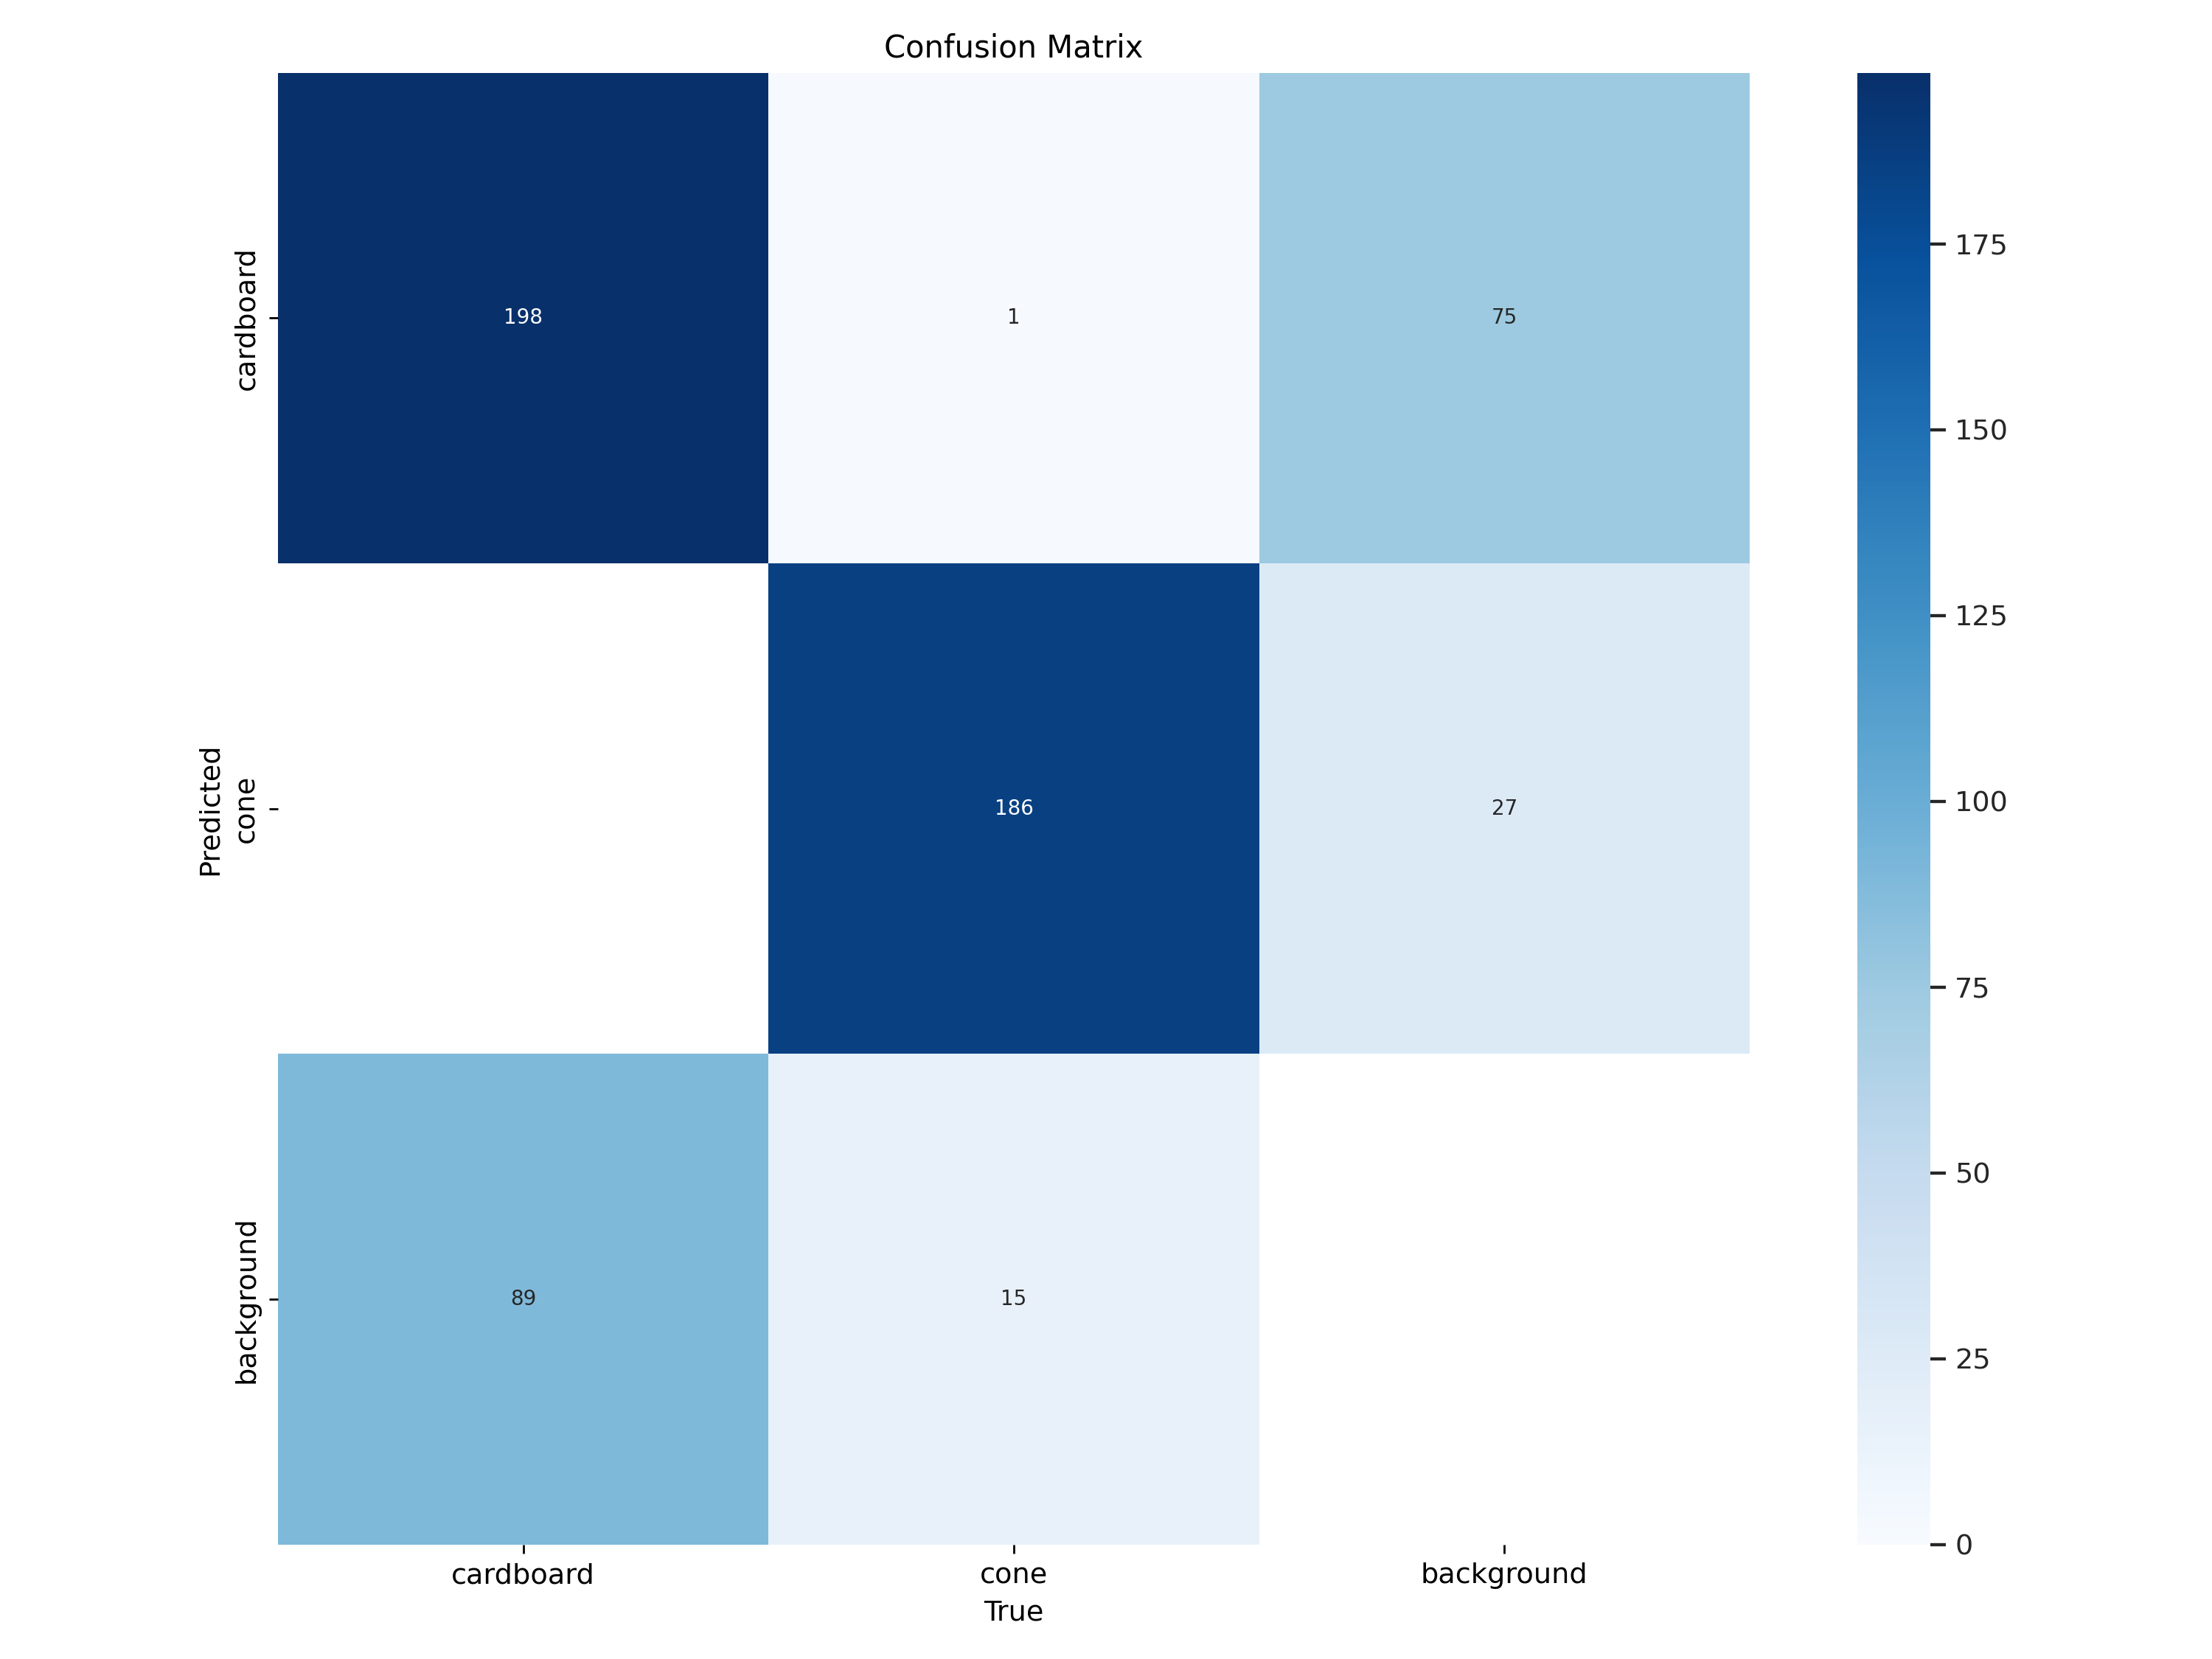

In [10]:
Image(filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

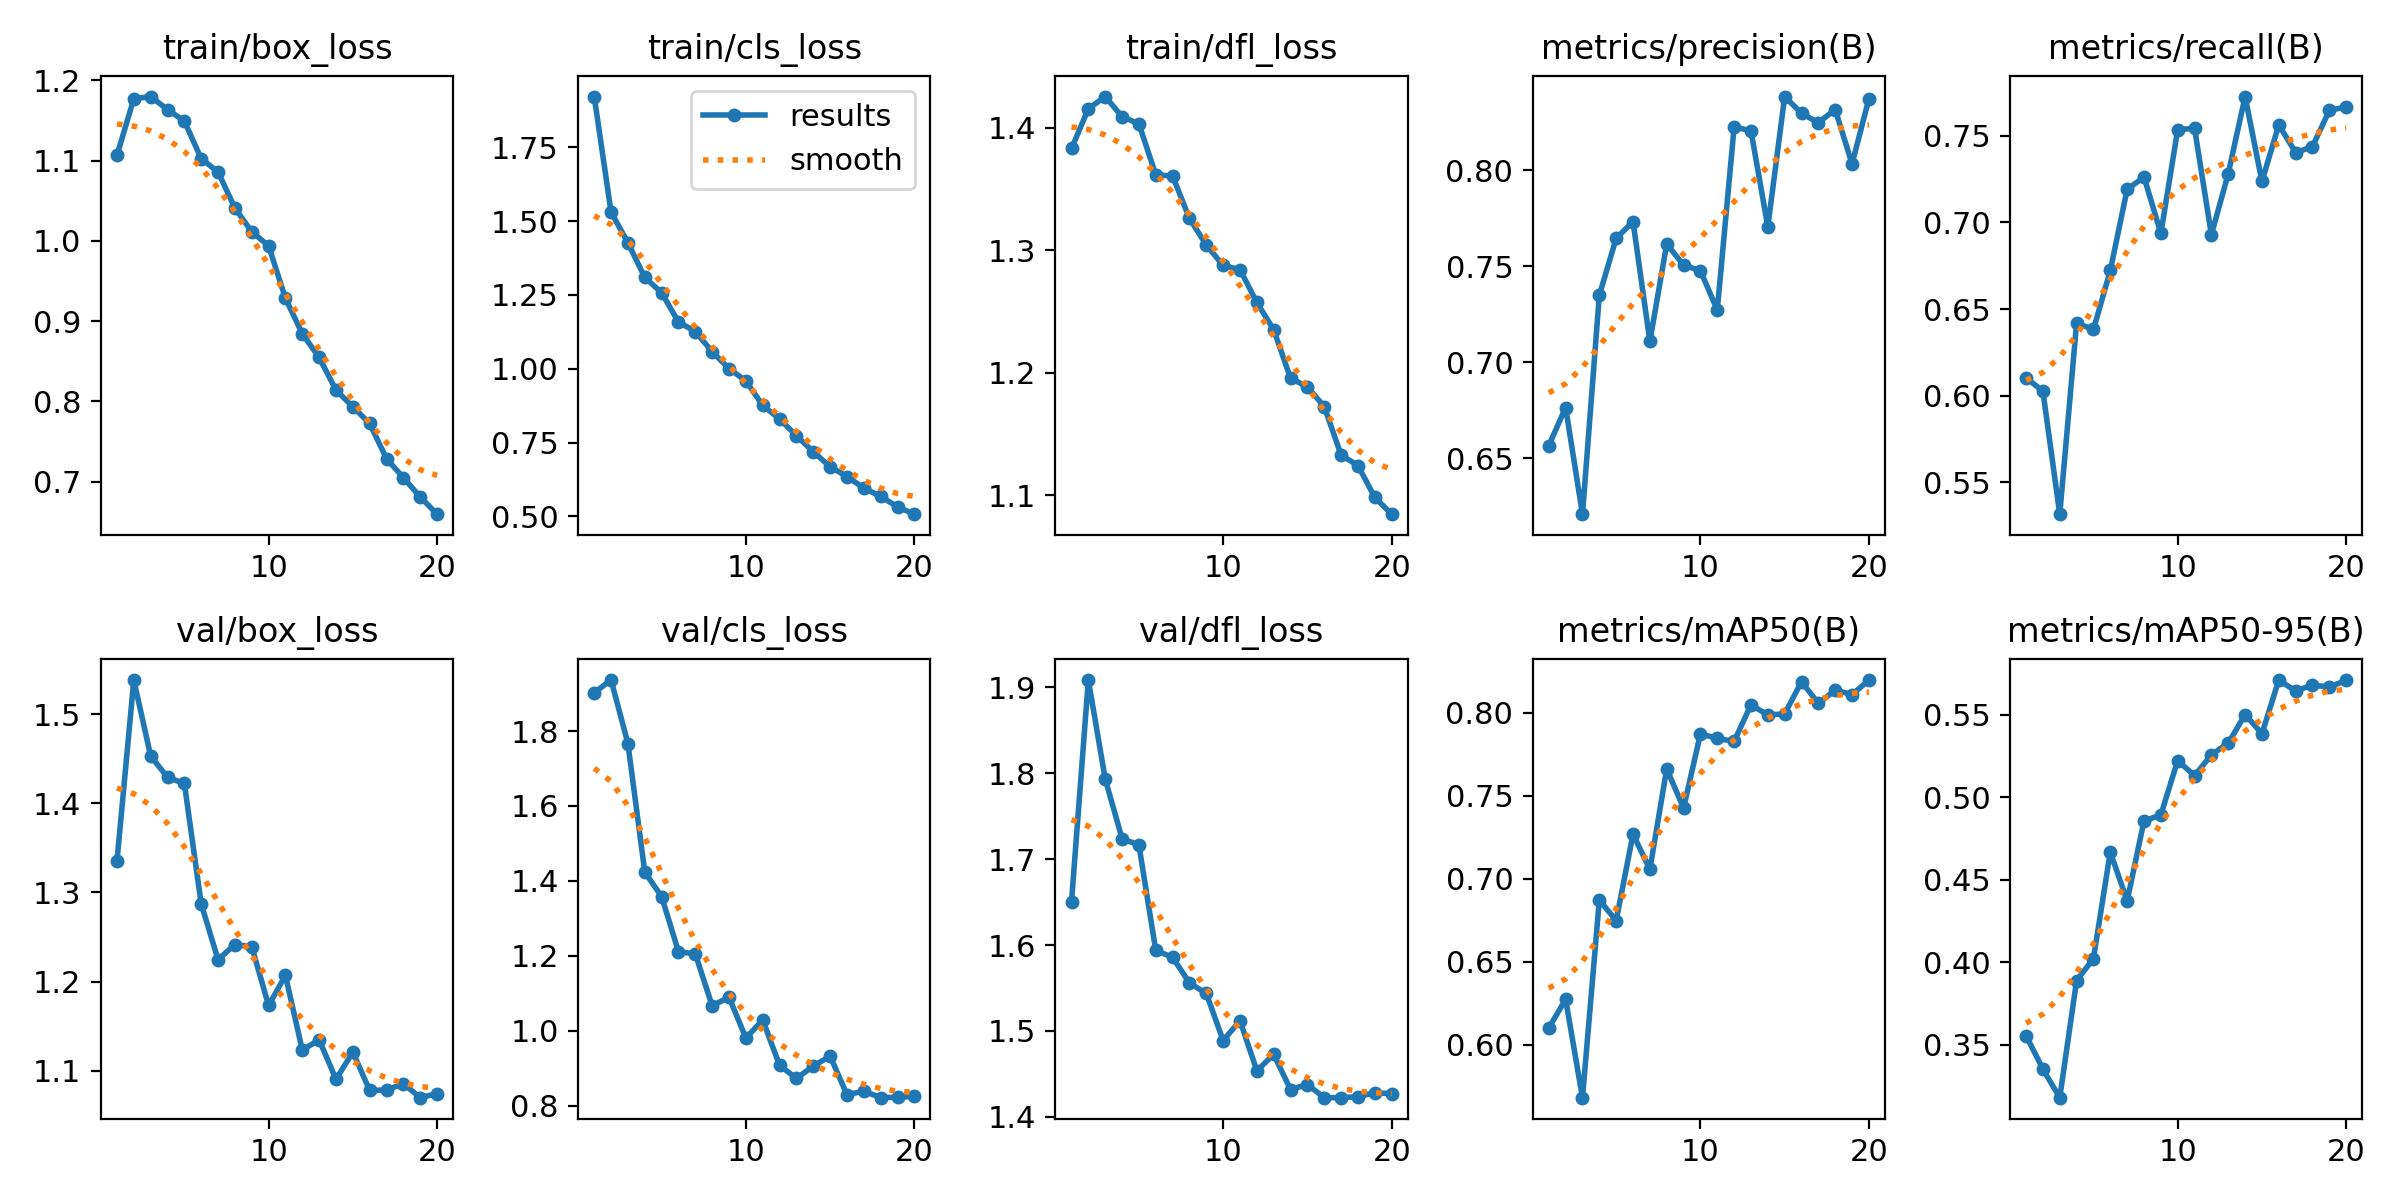

In [11]:
Image(filename=f'/content/runs/detect/train3/results.png', width=600)

In [12]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Object-Detection-1/valid/labels.cache... 214 images, 5 backgrounds, 0 corrupt: 100% 214/214 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 287, len(boxes) = 489. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:05<00:00,  2.47it/s]
                   all        214        489      0.828      0.754      0.819      0.571
             cardboard        214        287      0.799      0.617      0.721      0.563
                  cone        214        202      0.857      0.891      0.916       0.58
Speed: 1.5ms preprocess, 6.4ms infer

In [22]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml conf=0.1 source={dataset.location}/predict

Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/2 /content/Object-Detection-1/predict/test.png: 512x640 2 cardboards, 120.8ms
image 2/2 /content/Object-Detection-1/predict/test1.png: 512x640 1 cone, 25.9ms
Speed: 5.5ms preprocess, 73.4ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


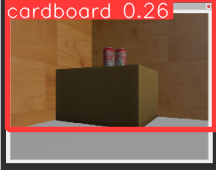

/n


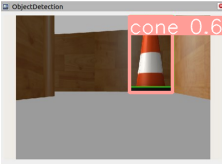

/n


In [24]:
import glob
from IPython.display import display,Image

for image_path in glob.glob(f'/content/runs/detect/predict4/*.png'):
  display(Image(filename=image_path,height=600))
  print("/n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')